Essay Evaluation

In [2]:
#Essay evaluation

#reducer function for merging 3 values

#how to make parallel workflow
#how to get structure output
#reducer function


In [34]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict, Annotated
from pydantic import BaseModel, Field

#python modeul, reducer
import operator 

In [35]:
load_dotenv()

model=ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite") #model that support structured output

In [36]:
#schema/rule with the help of pydantic

class EvaluationSchema(BaseModel):
    feedback: str = Field(description='Detailed feedback for the essay')
    score: int = Field(description='score out of 10', ge=0, le=10)

In [37]:
structuremodel = model.with_structured_output(EvaluationSchema)

In [38]:
essay = """The Digital Catalyst: India’s Strategic Role in the AI Revolution
As of 2026, Artificial Intelligence (AI) has transitioned from a specialized tech-frontier to a foundational pillar of global governance and economic growth. In this rapidly evolving landscape, India has emerged not just as a consumer of AI, but as a primary architect of "Inclusive AI." By leveraging its unique demographic scale, robust digital public infrastructure, and a proactive policy framework, India is redefining how technology can serve humanity on a global scale.
A Vision of "AI for All"
At the heart of India's strategy is the IndiaAI Mission, a comprehensive initiative backed by an investment of over ₹10,300 crore. The mission's core philosophy, "Making AI in India and Making AI Work for India," reflects a shift toward technological sovereignty. With the deployment of over 38,000 GPUs and the development of sovereign models like BharatGen—the world’s first government-funded multimodal large language model—India is ensuring that AI is not restricted by linguistic or financial barriers. Supporting 22 official languages, these tools are democratizing access for millions who were previously sidelined by the English-centric nature of the first wave of AI.
The Global South’s Laboratory
India’s role extends far beyond its borders. In February 2026, New Delhi hosted the India-AI Impact Summit, marking the first time a major global AI summit was held in the Global South. This event signaled a pivot from abstract discussions about "AI Safety" to the tangible "Impact" of AI.
India’s strength lies in its diversity and scale. If an AI solution—whether in rural healthcare diagnostics or precision agriculture—can be successfully deployed across India’s varied socio-economic landscape, it becomes a replicable blueprint for other developing nations. Through initiatives like the Global Partnership on Artificial Intelligence (GPAI), India is advocating for a "techno-legal" framework that balances innovation with ethical accountability, ensuring that AI development remains human-centric and safe.
Economic and Talent Powerhouse
The economic implications of this surge are profound. AI is projected to contribute nearly $1.7 trillion to India’s economy by 2035. Today, India boasts the third-largest AI-competitive workforce globally, with over 6 million people employed in the tech ecosystem. By focusing on "Future Skills," the government is training thousands of PhD fellows and students in Tier-2 and Tier-3 cities, ensuring that the AI boom creates a decentralized wave of prosperity.
Conclusion
In 2026, India stands at a pivotal juncture. It has moved beyond the "IT service provider" identity of the early 2000s to become a global leader in Sovereign AI. By championing transparency, multilingualism, and social empowerment, India is proving that the future of AI is not just about smarter machines, but about a more equitable world.
"""

In [39]:
prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n{essay}'
structuremodel.invoke(prompt)

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash-lite
Please retry in 3.632535067s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash-lite"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_va

ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash-lite
Please retry in 58.749236116s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash-lite"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 20
}
, retry_delay {
  seconds: 58
}
]

In [12]:
structuremodel.invoke(prompt).score

9

In [33]:
class UPSCState(TypedDict):
    essay:str
    language_feedback : str
    analysis_feedback: str
    clarity_feedback: str
    overall_feedback: str
    individual_scores: Annotated[list[int], operator.add] #to add all 3 score, so add is reducer function here
    avg_score: float



In [16]:
def evaluate_language(state: UPSCState):
    prompt = f'Evaluate the language quality of the following essay and provide a feedback and assign a score out of 10 \n{state["essay"]}'
    output=structuremodel.invoke(prompt)

    return {'language_feedback': output.feedback, 'individual_scores':[output.score]}

In [17]:
def evaluate_analysis(state: UPSCState):
    prompt = f'Evaluate the depth of analysis of the following essay and provide a feedback and assign a score out of 10 \n{state["essay"]}'
    output=structuremodel.invoke(prompt)

    return {'analysis_feedback': output.feedback, 'individual_scores':[output.score]}

In [18]:
def evaluate_thought(state: UPSCState):
    prompt = f'Evaluate the clarity of thought of the following essay and provide a feedback and assign a score out of 10 \n{state["essay"]}'
    output=structuremodel.invoke(prompt)

    return {'clarity_feedback': output.feedback, 'individual_scores':[output.score]}

In [30]:
def final_evaluation(state: UPSCState):

    #summary feedback
    prompt = f'Based on the following feedbacks create a summarized feedback \n language_feedback -{state['language_feedback']} \n depth of analysis feedback - {state['analysis_feedback']} \n clarity of thought feedback - {state["clarity_feedback"]}'
    overall_feedback = model.invoke(prompt).content

    #average scores
    avg_score=sum(state['individual_scores'])/len(state['individual_scores'])

    return {'overall_feedback': overall_feedback, 'avg_score': avg_score}

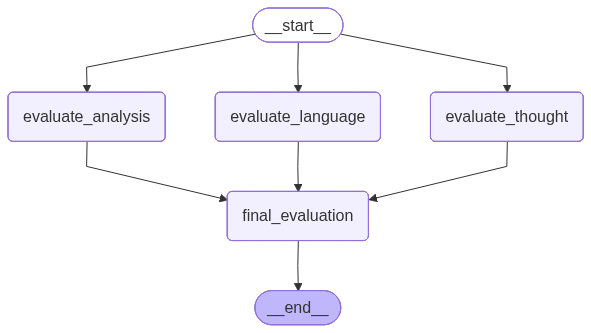

In [31]:
graph = StateGraph(UPSCState)

#add nodes
graph.add_node('evaluate_language', evaluate_language)
graph.add_node('evaluate_analysis', evaluate_analysis)
graph.add_node('evaluate_thought', evaluate_thought)
graph.add_node('final_evaluation', final_evaluation)

#add edges
graph.add_edge(START, 'evaluate_language')
graph.add_edge(START, 'evaluate_analysis')
graph.add_edge(START, 'evaluate_thought')

graph.add_edge('evaluate_language','final_evaluation')
graph.add_edge('evaluate_analysis','final_evaluation')
graph.add_edge('evaluate_thought','final_evaluation')

graph.add_edge('final_evaluation', END)

workflow = graph.compile()

workflow



#invoke the function

In [32]:
initial_state = {
    'essay':essay
}

workflow.invoke(initial_state)

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash-lite
Please retry in 52.741884582s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash-lite"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_v

ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash-lite
Please retry in 50.264372648s. [links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.5-flash-lite"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 20
}
, retry_delay {
  seconds: 50
}
]

In [26]:
essay2="""The Big Role of India in AI Techology
India is now becoming very big power in AI field. Many people thinking that India only doing coding for other countrys, but now things is change. India is now making own AI which is very powerful for the world. The goverment of India starting "IndiaAI Mission" and putting many crores of money to buying fast computers and GPUs.



The main reason why India is important because we have too many data. In AI, data is like food for the brain. Because India have 1.4 billion people using internet, we have so many variety of data. This helping to making AI that can speaking in Hindi, Tamil, Bengali, and all 22 languages. Normal AI from America only knowing English good, but India AI making sure that village people also can using technology.

Also, India is very good in "jugaad" or finding cheap way to doing big things. We making AI for doctors to finding cancer in small towns where big hospital is not there. We also helping farmers to knowing when rain is coming or which bug is eating the crop. This is why India is leader of Global South. Other poor countrys looking at India and saying, "If India can do it, we also can do it."



In 2026, the world seeing that India not just worker, but India is the boss of AI innovation. We having millions of students learning about machine learning and deep learning. Even if English is little bit weak in some place, the brain is very sharp. AI is the future, and India is sitting in the driving seat of that car."""

In [27]:
initial_state = {
    'essay':essay2
}

workflow.invoke(initial_state)

{'essay': 'The Big Role of India in AI Techology\nIndia is now becoming very big power in AI field. Many people thinking that India only doing coding for other countrys, but now things is change. India is now making own AI which is very powerful for the world. The goverment of India starting "IndiaAI Mission" and putting many crores of money to buying fast computers and GPUs.\n\n\n\nThe main reason why India is important because we have too many data. In AI, data is like food for the brain. Because India have 1.4 billion people using internet, we have so many variety of data. This helping to making AI that can speaking in Hindi, Tamil, Bengali, and all 22 languages. Normal AI from America only knowing English good, but India AI making sure that village people also can using technology.\n\nAlso, India is very good in "jugaad" or finding cheap way to doing big things. We making AI for doctors to finding cancer in small towns where big hospital is not there. We also helping farmers to kno

In [28]:
essay3="""India AI is Coming Very Fastly
Now days, AI is everywhere like mobile and laptop. India is also jumping in this AI water very strongly. Earlier India only fixing computers for western country, but now India making own brain for AI. The "IndiaAI Mission" is big plan where goverment giving too much money for big machines. They want to make AI that talk in many many languages like Marathi and Gujarati so old people also can talking to computer.

The big thing is India have many many people. This people generate too much data every day on WhatsApp and UPI. AI need data for eating and growing, so India is like a big buffet for AI. In 2026, we see that Indian students is very smart. Even if they don't have high-fi school, they learn coding on cheap phone. This is called "Democratization of AI," which means AI for everyone, not just for rich people in Bangalore or Delhi.

India also helping other country. We make AI for farming and for medicine that is very low price. When AI is cheap, then poor people also get benefit. So, India role is to make AI very friendly and very cheap for whole world. Future is looking very bright like a sun because of India's AI power."""

In [29]:
initial_state = {
    'essay':essay3
}

workflow.invoke(initial_state)

{'essay': 'India AI is Coming Very Fastly\nNow days, AI is everywhere like mobile and laptop. India is also jumping in this AI water very strongly. Earlier India only fixing computers for western country, but now India making own brain for AI. The "IndiaAI Mission" is big plan where goverment giving too much money for big machines. They want to make AI that talk in many many languages like Marathi and Gujarati so old people also can talking to computer.\n\nThe big thing is India have many many people. This people generate too much data every day on WhatsApp and UPI. AI need data for eating and growing, so India is like a big buffet for AI. In 2026, we see that Indian students is very smart. Even if they don\'t have high-fi school, they learn coding on cheap phone. This is called "Democratization of AI," which means AI for everyone, not just for rich people in Bangalore or Delhi.\n\nIndia also helping other country. We make AI for farming and for medicine that is very low price. When AI